## ANALYSIS OF ANIMALS IN THE AUSTIN TOWN LAKE ANIMAL SHELTER

### IMPORT THE DATA



#### Data animals in the Austin Town Lake animal shelter
Description

This data contains intake and outcome measures for animals in the Town Lake Animal shelter in Austin, TX

Usage
AnimalData
Format
This dataframce contains the following:

Impound.No
Animal ID

Intake.Date
Date of animal arrival

Intake.Type
How the animal was aquired

Animal.Type
Dog or cat ?

Neutered.Status
Is the animal spayed, neutered, or still intact ?

Sex
Male or female?

Age.Intake
Age of animal in years upon arrival

Condition
Health of animal upon arrival

Breed
Breed of animal

Aggressive
Dogs only - aggressive tendencies? (Y=Yes, N=No)

Independent
Dogs only - known to be independent? (Y=Yes, N=No)

Intelligent
Dogs only - known to be intelligent? (Y=Yes, N=No)

Loyal
Dogs only - known to be loyal? (Y=Yes, N=No)

Social
Dogs only - known to be social? (Y=Yes, N=No)

Good.with.Kids
Dogs only - good with children? (Y=Yes, N=No)

Max.Life.Expectancy
Dogs only - typical life expectancy in years

Max.Weight
Dogs only - typical maximum weight in pounds

Dog.Group
Dogs only - breed group

Color
Color of animal

Weight
Weight of animal in pounds

Lab.Test
Lab tests performed and results

Outcome.Date
Date animal left shelter

Outcome.Type
What happened to the animal

Days.Shelter
Number of days spent in shelter




In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
#Read the data in
data= pd.read_csv('C:\\Users\\ajibo\\Desktop\\SENSORS ACTIVITY\\AnimalData.csv')


In [3]:
data_chk = data.copy()

In [4]:
data

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,...,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
0,K12-000031,1/1/12,Stray,Dog,Spayed,Female,10,Injured or Sick,Chihuahua Sh Mix,N,...,N,18.0,6.0,Toy,Tan & White,3.30,Heartworm Negative,1/7/12,Adoption,6
1,K12-000037,1/1/12,Stray,Dog,Intact,Female,3,Normal,Rat Terrier Mix,N,...,Y,14.0,25.0,Terrier,White & Brown,7.50,No Lab Test,1/3/12,Return to Owner,2
2,K12-000108,1/1/12,Stray,Dog,Intact,Male,2,Normal,Pit Bull Mix,N,...,Y,14.0,90.0,Terrier,Blue & White,74.00,Heartworm Negative,1/13/12,Humane Euthanasia,12
3,K12-000125,1/1/12,Stray,Dog,Neutered,Male,0,Normal,Labrador Retr & Border Collie,N,...,Y,12.0,79.0,Sporting,White & Black,22.00,No Lab Test,1/8/12,Adoption,7
4,K12-000157,1/1/12,Stray,Dog,Neutered,Male,3,Injured or Sick,Labrador Retr,N,...,Y,12.0,79.0,Sporting,Black & White,54.00,Heartworm Negative,4/4/12,Adoption,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,K12-022689,12/23/12,Stray,Cat,Intact,Male,0,Normal,Domestic Sh Mix,NaN,...,NaN,NaN,NaN,NaN,Crm Tabby,1.75,"FeLV Negative, FIV Negative",12/31/12,Humane Euthanasia,8
469,K12-022743,12/23/12,Owner Surrender,Cat,Intact,Male,0,Normal,Domestic Sh Mix,NaN,...,NaN,NaN,NaN,NaN,Brn Tabby & White,1.75,"FeLV Negative, FIV Negative",1/4/13,Transfer,12
470,K12-022814,12/23/12,Owner Surrender,Dog,Neutered,Male,4,Injured or Sick,Bruss Griffon Mix,N,...,Y,15.0,10.0,Toy,Brown,10.50,No Lab Test,12/29/12,Humane Euthanasia,6
471,K12-022885,12/30/12,Stray,Dog,Intact,Male,2,Normal,Poodle Min Mix,N,...,Y,14.0,9.0,Toy,White,13.50,Heartworm Negative,1/4/13,Return to Owner,5


###  1. How long do animals stay in the shelter before they are adopted?


In [5]:
data2 = data[data['Outcome.Type'] == 'Adoption' ] 

In [6]:
data2

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,...,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
0,K12-000031,1/1/12,Stray,Dog,Spayed,Female,10,Injured or Sick,Chihuahua Sh Mix,N,...,N,18.0,6.0,Toy,Tan & White,3.30,Heartworm Negative,1/7/12,Adoption,6
3,K12-000125,1/1/12,Stray,Dog,Neutered,Male,0,Normal,Labrador Retr & Border Collie,N,...,Y,12.0,79.0,Sporting,White & Black,22.00,No Lab Test,1/8/12,Adoption,7
4,K12-000157,1/1/12,Stray,Dog,Neutered,Male,3,Injured or Sick,Labrador Retr,N,...,Y,12.0,79.0,Sporting,Black & White,54.00,Heartworm Negative,4/4/12,Adoption,94
9,K12-000497,1/8/12,Stray,Dog,Spayed,Female,6,Normal,Chihuahua Sh Mix,N,...,N,18.0,6.0,Toy,Tan & White,9.50,Heartworm Negative,1/22/12,Adoption,14
10,K12-000498,1/8/12,Stray,Dog,Neutered,Male,1,Normal,Fox Terrier Smooth Mix,N,...,N,15.0,20.0,Terrier,White & Red,16.50,Heartworm Negative,1/19/12,Adoption,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,K12-022379,12/16/12,Stray,Dog,Spayed,Female,3,Normal,Norfolk Terrier Mix,Y,...,Y,15.0,11.0,Terrier,Cream,10.00,Heartworm Negative,12/23/12,Adoption,7
456,K12-022399,12/16/12,Stray,Dog,Neutered,Male,2,Normal,Poodle Min Mix,N,...,Y,14.0,9.0,Toy,White & Black,9.25,Heartworm Negative,12/24/12,Adoption,8
458,K12-022495,12/16/12,Stray,Dog,Spayed,Female,4,Normal,Maltese Mix,N,...,Y,14.0,7.0,Toy,White,8.50,Heartworm Negative,12/27/12,Adoption,11
465,K12-022595,12/23/12,Stray,Dog,Neutered,Male,0,Normal,Norfolk Terrier Mix,Y,...,Y,15.0,11.0,Terrier,Cream & White,7.50,No Lab Test,12/31/12,Adoption,8


In [7]:
data3 = data2[[ 'Outcome.Type', 'Days.Shelter']]

In [8]:
data3.head()

,Outcome.Type,Days.Shelter
0,Adoption,6
3,Adoption,7
4,Adoption,94
9,Adoption,14
10,Adoption,11


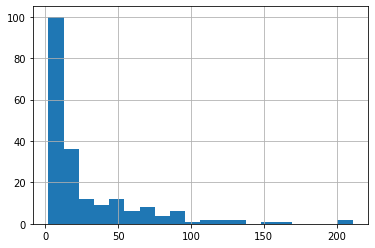

In [9]:
data3['Days.Shelter'].hist(bins=20)

In [10]:
mean= sum(data3['Days.Shelter']/ len(data3['Days.Shelter']))

In [11]:
mean

29.264705882352963

In [12]:
median = sorted(data3['Days.Shelter'])[len(data3['Days.Shelter'])//2]

In [13]:
median

13

In [14]:
np.mean(data3['Days.Shelter'])

29.264705882352942

In [15]:
np.median(data3['Days.Shelter'])

13.0

In [16]:
data3['Days.Shelter'].var()

1275.594610257897

In [17]:
data3['Days.Shelter'].std()

35.715467381204704

In [18]:
dat = data3['Days.Shelter']

In [19]:
dat

0       6
3       7
4      94
9      14
10     11
       ..
455     7
456     8
458    11
465     8
472     5
Name: Days.Shelter, Length: 204, dtype: int64

In [20]:
outliers= []
def detect_outliers(dat):
    threshold=3
    mean= np.mean(dat)
    std= np.std(dat)
    for i in dat:
        z_score= (i-mean)/std
        if np.abs(z_score) >threshold:
            outliers.append(i)
    return outliers

In [21]:
oulier_pt= detect_outliers(dat)

In [22]:
oulier_pt

[152, 201, 159, 211]

In [23]:
Three_STD=data3['Days.Shelter'].std() *3

In [24]:
Three_STD

107.14640214361411

In [83]:
outliers= []
def detect_outliers(dat):
    threshold=4
    mean= np.median(dat)
    std= np.std(dat)
    for i in dat:
        z_score= (i-median)/std
        if np.abs(z_score) >threshold:
            outliers.append(i)
    return outliers

In [84]:
pt= detect_outliers(dat)

In [85]:
pt

[201, 159, 211]

### REPORT

1.The above results  shows that the average period animals spend in the shelter is more than two weeks. 
The histogram also shows that data is skewed t0 the right, which gives an outliers of 211. 

The longest day an animal spent in the shelter was 211 days before being adopted . The animal is a dog and he is agressive. He attended into the shelter being injured on 11/18/12 when he was 2 years old.

 ### 2. Compare the weight of adult cats and dogs at the shelter. How typical would it be to find a 13-pound cat? What about a 13-pound dog?

In [88]:
DTable211 = data[data['Days.Shelter'] ==211 ]

In [89]:
DTable211

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,...,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
424,K12-020743,11/18/12,Stray,Dog,Neutered,Male,2,Injured or Sick,Aust Cattle Dog & Labrador Retr,Y,...,Y,16.0,35.0,Herding,White & Tan,48.25,Heartworm Negative,6/17/13,Adoption,211


In [27]:
DTable = data[data['Days.Shelter'] <211 ]

In [28]:
DTable2 = DTable[DTable['Age.Intake'] >=1 ]

In [29]:
DTable2.head(2)

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,...,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
0,K12-000031,1/1/12,Stray,Dog,Spayed,Female,10,Injured or Sick,Chihuahua Sh Mix,N,...,N,18.0,6.0,Toy,Tan & White,3.3,Heartworm Negative,1/7/12,Adoption,6
1,K12-000037,1/1/12,Stray,Dog,Intact,Female,3,Normal,Rat Terrier Mix,N,...,Y,14.0,25.0,Terrier,White & Brown,7.5,No Lab Test,1/3/12,Return to Owner,2


In [30]:
DTable3 = DTable2[DTable2['Animal.Type'] =='Dog' ]

In [31]:
DTable3

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,...,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
0,K12-000031,1/1/12,Stray,Dog,Spayed,Female,10,Injured or Sick,Chihuahua Sh Mix,N,...,N,18.0,6.0,Toy,Tan & White,3.30,Heartworm Negative,1/7/12,Adoption,6
1,K12-000037,1/1/12,Stray,Dog,Intact,Female,3,Normal,Rat Terrier Mix,N,...,Y,14.0,25.0,Terrier,White & Brown,7.50,No Lab Test,1/3/12,Return to Owner,2
2,K12-000108,1/1/12,Stray,Dog,Intact,Male,2,Normal,Pit Bull Mix,N,...,Y,14.0,90.0,Terrier,Blue & White,74.00,Heartworm Negative,1/13/12,Humane Euthanasia,12
4,K12-000157,1/1/12,Stray,Dog,Neutered,Male,3,Injured or Sick,Labrador Retr,N,...,Y,12.0,79.0,Sporting,Black & White,54.00,Heartworm Negative,4/4/12,Adoption,94
5,K12-000286,1/1/12,Stray,Dog,Neutered,Male,5,Normal,Yorkshire Terr,N,...,Y,15.0,7.0,Terrier,Silver & Tan,4.80,Heartworm Negative,1/10/12,Return to Owner,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,K12-022585,12/23/12,Stray,Dog,Neutered,Male,8,Normal,Labrador Retr Mix,N,...,Y,12.0,79.0,Sporting,Yellow,82.50,No Lab Test,12/24/12,Return to Owner,1
466,K12-022596,12/23/12,Owner Surrender,Dog,Intact,Female,1,Injured or Sick,Shih Tzu Mix,N,...,Y,16.0,16.0,Non-Sporting,White & Black,5.75,No Lab Test,12/24/12,Transfer,1
470,K12-022814,12/23/12,Owner Surrender,Dog,Neutered,Male,4,Injured or Sick,Bruss Griffon Mix,N,...,Y,15.0,10.0,Toy,Brown,10.50,No Lab Test,12/29/12,Humane Euthanasia,6
471,K12-022885,12/30/12,Stray,Dog,Intact,Male,2,Normal,Poodle Min Mix,N,...,Y,14.0,9.0,Toy,White,13.50,Heartworm Negative,1/4/13,Return to Owner,5


In [32]:
len(DTable3)

225

In [33]:
CTable = data[data['Days.Shelter'] <211]

In [34]:
CTable2 = CTable[CTable['Age.Intake'] >= 1]

In [35]:
CTable2 

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,...,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
0,K12-000031,1/1/12,Stray,Dog,Spayed,Female,10,Injured or Sick,Chihuahua Sh Mix,N,...,N,18.0,6.0,Toy,Tan & White,3.30,Heartworm Negative,1/7/12,Adoption,6
1,K12-000037,1/1/12,Stray,Dog,Intact,Female,3,Normal,Rat Terrier Mix,N,...,Y,14.0,25.0,Terrier,White & Brown,7.50,No Lab Test,1/3/12,Return to Owner,2
2,K12-000108,1/1/12,Stray,Dog,Intact,Male,2,Normal,Pit Bull Mix,N,...,Y,14.0,90.0,Terrier,Blue & White,74.00,Heartworm Negative,1/13/12,Humane Euthanasia,12
4,K12-000157,1/1/12,Stray,Dog,Neutered,Male,3,Injured or Sick,Labrador Retr,N,...,Y,12.0,79.0,Sporting,Black & White,54.00,Heartworm Negative,4/4/12,Adoption,94
5,K12-000286,1/1/12,Stray,Dog,Neutered,Male,5,Normal,Yorkshire Terr,N,...,Y,15.0,7.0,Terrier,Silver & Tan,4.80,Heartworm Negative,1/10/12,Return to Owner,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,K12-022585,12/23/12,Stray,Dog,Neutered,Male,8,Normal,Labrador Retr Mix,N,...,Y,12.0,79.0,Sporting,Yellow,82.50,No Lab Test,12/24/12,Return to Owner,1
466,K12-022596,12/23/12,Owner Surrender,Dog,Intact,Female,1,Injured or Sick,Shih Tzu Mix,N,...,Y,16.0,16.0,Non-Sporting,White & Black,5.75,No Lab Test,12/24/12,Transfer,1
470,K12-022814,12/23/12,Owner Surrender,Dog,Neutered,Male,4,Injured or Sick,Bruss Griffon Mix,N,...,Y,15.0,10.0,Toy,Brown,10.50,No Lab Test,12/29/12,Humane Euthanasia,6
471,K12-022885,12/30/12,Stray,Dog,Intact,Male,2,Normal,Poodle Min Mix,N,...,Y,14.0,9.0,Toy,White,13.50,Heartworm Negative,1/4/13,Return to Owner,5


In [36]:
CTable3= CTable2[CTable2['Animal.Type'] =='Cat' ]

In [37]:
CTable3

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,...,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
13,K12-000642,1/15/12,Owner Surrender,Cat,Spayed,Female,15,Normal,Domestic Sh Mix,NaN,...,NaN,NaN,NaN,NaN,Black,9.80,"FeLV Negative, FIV Negative",1/24/12,Adoption,9
14,K12-000653,1/15/12,Stray,Cat,Neutered,Male,4,Normal,Maine Coon Mix,NaN,...,NaN,NaN,NaN,NaN,Blue,13.00,"FeLV Negative, FIV Positive",1/26/12,Return to Owner,11
16,K12-000798,1/15/12,Owner Surrender,Cat,Spayed,Female,4,Normal,Domestic Sh Mix,NaN,...,NaN,NaN,NaN,NaN,Tortie,9.00,"FeLV Negative, FIV Negative",3/30/12,Transfer,75
18,K12-000893,1/15/12,Owner Surrender,Cat,Spayed,Female,2,Normal,Domestic Sh Mix,NaN,...,NaN,NaN,NaN,NaN,Brn Tabby,10.50,"FeLV Negative, FIV Positive",2/12/12,Adoption,28
22,K12-000975,1/22/12,Stray,Cat,Neutered,Male,2,Injured or Sick,Domestic Sh Mix,NaN,...,NaN,NaN,NaN,NaN,Brn Tabby & White,6.30,"FeLV Negative, FIV Negative",1/22/12,Return to Owner,0
24,K12-001062,1/22/12,Owner Surrender,Cat,Spayed,Female,9,Normal,Domestic Sh Mix,NaN,...,NaN,NaN,NaN,NaN,Brn Tabby,6.75,"FeLV Negative, FIV Negative",8/9/12,Humane Euthanasia,200
32,K12-001302,1/29/12,Stray,Cat,Spayed,Female,4,Injured or Sick,Domestic Lh Mix,NaN,...,NaN,NaN,NaN,NaN,Tortie,10.80,"FeLV Negative, FIV Negative",2/20/12,Adoption,22
50,K12-002176,2/12/12,Stray,Cat,Neutered,Male,3,Injured or Sick,Domestic Sh Mix,NaN,...,NaN,NaN,NaN,NaN,Blue,9.00,"FeLV Negative, FIV Negative",3/13/12,Adoption,30
54,K12-002352,2/19/12,Stray,Cat,Neutered,Male,4,Injured or Sick,Domestic Sh Mix,NaN,...,NaN,NaN,NaN,NaN,Black,13.50,No Lab Test,2/24/12,Humane Euthanasia,5
58,K12-002514,2/19/12,Stray,Cat,Neutered,Male,3,Normal,Domestic Sh Mix,NaN,...,NaN,NaN,NaN,NaN,Black & White,10.00,"FeLV Negative, FIV Negative",3/6/12,Adoption,16


In [38]:
len(CTable3)

56

In [39]:
DTable_WT= DTable3['Weight']

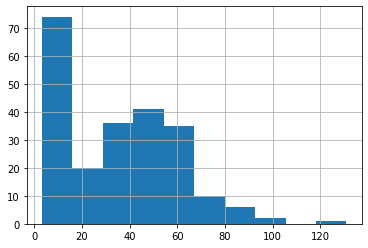

In [40]:
DTable_WT.hist(bins=10)

In [41]:
CTable_WT= CTable3['Weight']

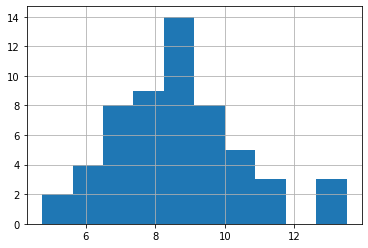

In [42]:
CTable_WT.hist()

### MEASURES OF CENTRE AND SPREAD OF THE DISTRIBUTION OF DOGS


In [43]:
AVG= DTable3['Weight']

In [44]:
AVG.shape

(225,)

In [45]:
MEAN= np.mean(AVG)

In [46]:
MEAN

35.614444444444445

In [47]:
MEDIAN= np.median(AVG)

In [48]:
MEDIAN

35.0

In [49]:
MODE = stats.mode(AVG)

In [50]:
MODE

ModeResult(mode=array([13.5]), count=array([6]))

In [51]:
VAR= AVG.var() 

In [52]:
VAR

552.4073373015874

In [53]:
STD = AVG.std()

In [54]:
STD

23.503347363760493

### MEASURES OF CENTRE AND SPREAD OF THE DISTRIBUTION OF CATS

In [55]:
AVG2= CTable3['Weight']

In [56]:
AVG2.shape

(56,)

In [57]:
MEAN= np.mean(AVG2)

In [58]:
MEAN

8.60357142857143

In [59]:
MEDIAN= np.median(AVG2)

In [60]:
MEDIAN

8.5

In [61]:
MODE = stats.mode(AVG2)

In [62]:
MODE

ModeResult(mode=array([8.5]), count=array([6]))

In [63]:
VAR= AVG2.var() 

In [64]:
VAR

3.653896103896103

In [65]:
STD = AVG2.std()

In [66]:
STD

1.9115167024894402

### INTERQUTILE OF DOGS


In [67]:
DTable_WT2= DTable3[DTable3['Weight'] == 13]

In [68]:
DTable_WT2

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,...,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
431,K12-021224,11/25/12,Stray,Dog,Intact,Male,3,Normal,Chihuahua Sh Mix,N,...,N,18.0,6.0,Toy,Brown,13.0,Heartworm Negative,12/15/12,Transfer,20


In [69]:
DTable_WT2.describe()

,Age.Intake,Max.Life.Expectancy,Max.Weight,Weight,Days.Shelter
count,1.0,1.0,1.0,1.0,1.0
mean,3.0,18.0,6.0,13.0,20.0
std,NaN,NaN,NaN,NaN,NaN
min,3.0,18.0,6.0,13.0,20.0
25%,3.0,18.0,6.0,13.0,20.0
50%,3.0,18.0,6.0,13.0,20.0
75%,3.0,18.0,6.0,13.0,20.0
max,3.0,18.0,6.0,13.0,20.0


In [70]:
DTable_WT3 = DTable_WT2['Weight']

In [71]:
DTable_WT3

431    13.0
Name: Weight, dtype: float64

In [72]:
quartile = percentile(DTable_WT3,[25,50,75])

In [73]:
quartile

array([13., 13., 13.])

### Z-SCORE AND Z-SCORE OF CATS
 Z-score is how many standard deviations you are from the mean. 

In [74]:
CTable_WT2= CTable3[CTable3['Weight'] == 13]

In [75]:
CTable_WT2

,Impound.No,Intake.Date,Intake.Type,Animal.Type,Neutered.Status,Sex,Age.Intake,Condition,Breed,Aggressive,...,Good.with.Kids,Max.Life.Expectancy,Max.Weight,Dog.Group,Color,Weight,Lab.Test,Outcome.Date,Outcome.Type,Days.Shelter
14,K12-000653,1/15/12,Stray,Cat,Neutered,Male,4,Normal,Maine Coon Mix,NaN,...,NaN,NaN,NaN,NaN,Blue,13.0,"FeLV Negative, FIV Positive",1/26/12,Return to Owner,11


In [76]:
CTable_WT3 = CTable_WT2['Weight']

In [77]:
CTable_WT3

14    13.0
Name: Weight, dtype: float64

In [82]:
stats.zscore(CTable_WT3)

array([nan])

### REPORTS


In [79]:
data_chk['Weight'].describe()

count    473.000000
mean      20.889725
std       22.458839
min        0.250000
25%        4.000000
50%       10.250000
75%       35.500000
max      131.000000
Name: Weight, dtype: float64

In [80]:
DTable['Weight'].describe()

count    472.000000
mean      20.831758
std       22.447219
min        0.250000
25%        3.937500
50%       10.125000
75%       35.125000
max      131.000000
Name: Weight, dtype: float64

In [81]:
DTable3['Weight'].describe()

count    225.000000
mean      35.614444
std       23.503347
min        3.300000
25%       13.500000
50%       35.000000
75%       54.000000
max      131.000000
Name: Weight, dtype: float64

In [90]:
CTable3['Weight'].describe()

count    56.000000
mean      8.603571
std       1.911517
min       4.750000
25%       7.450000
50%       8.500000
75%       9.750000
max      13.500000
Name: Weight, dtype: float64

### FINAL REPORT

The above results shows it's not likely to gets cats and dogs weight of 13pounds.About 75% of the cars weighed more than 13pounds already. 

And for the cats, 75% of them weighed less than 9.7. 